# Lab 5: Convolutional Neural Networks
## Student ID: 2447218

This notebook implements the following tasks:
1. Convolution operation with stride 1 and 2
2. Apply max-pooling, average-pooling, and sum-pooling
3. Visualize flattened feature maps
4. Learn weights and bias for flattened arrays
5. Design and implement a CNN for image classification


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import correlate2d
import warnings
warnings.filterwarnings('ignore')


## Task 1: Convolution Operation with Stride 1 and 2

Given:
- Input matrix: 5x5
- Kernel: 3x3
- Strides: 1 and 2


In [2]:
# Define input matrix and kernel from the given image
input_matrix = np.array([
    [1, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [0, 1, 1, 1, 0],
    [1, 1, 0, 1, 0]
])

kernel = np.array([
    [1, 0, 0],
    [0, 0, 1],
    [1, 1, 0]
])

print("Input Matrix (5x5):")
print(input_matrix)
print("\nKernel (3x3):")
print(kernel)


Input Matrix (5x5):
[[1 0 1 1 0]
 [0 0 0 1 1]
 [1 0 0 0 1]
 [0 1 1 1 0]
 [1 1 0 1 0]]

Kernel (3x3):
[[1 0 0]
 [0 0 1]
 [1 1 0]]


In [3]:
def convolve2d(input_matrix, kernel, stride=1):
    """
    Perform 2D convolution on input matrix with given kernel and stride
    """
    input_h, input_w = input_matrix.shape
    kernel_h, kernel_w = kernel.shape
    
    # Calculate output dimensions
    output_h = (input_h - kernel_h) // stride + 1
    output_w = (input_w - kernel_w) // stride + 1
    
    # Initialize output
    output = np.zeros((output_h, output_w))
    
    # Perform convolution
    for i in range(0, output_h):
        for j in range(0, output_w):
            # Extract region
            region = input_matrix[i*stride:i*stride+kernel_h, j*stride:j*stride+kernel_w]
            # Element-wise multiplication and sum
            output[i, j] = np.sum(region * kernel)
    
    return output


In [4]:
# Perform convolution with stride 1
conv_stride1 = convolve2d(input_matrix, kernel, stride=1)
print("Convolution Result (Stride = 1):")
print(conv_stride1)
print(f"Output shape: {conv_stride1.shape}\n")

# Perform convolution with stride 2
conv_stride2 = convolve2d(input_matrix, kernel, stride=2)
print("Convolution Result (Stride = 2):")
print(conv_stride2)
print(f"Output shape: {conv_stride2.shape}")


Convolution Result (Stride = 1):
[[2. 1. 2.]
 [1. 2. 3.]
 [4. 2. 1.]]
Output shape: (3, 3)

Convolution Result (Stride = 2):
[[2. 2.]
 [4. 1.]]
Output shape: (2, 2)


## Task 2: Apply Pooling Operations

Apply max-pooling, average-pooling, and sum-pooling to the convolution results (Q1)


In [5]:
def pooling(input_matrix, pool_size=2, stride=2, mode='max'):
    """
    Perform pooling operation on input matrix
    mode: 'max', 'avg', or 'sum'
    """
    input_h, input_w = input_matrix.shape
    
    # Calculate output dimensions
    output_h = (input_h - pool_size) // stride + 1
    output_w = (input_w - pool_size) // stride + 1
    
    # Initialize output
    output = np.zeros((output_h, output_w))
    
    # Perform pooling
    for i in range(output_h):
        for j in range(output_w):
            # Extract region
            region = input_matrix[i*stride:i*stride+pool_size, j*stride:j*stride+pool_size]
            
            if mode == 'max':
                output[i, j] = np.max(region)
            elif mode == 'avg':
                output[i, j] = np.mean(region)
            elif mode == 'sum':
                output[i, j] = np.sum(region)
    
    return output


In [6]:
# Apply pooling operations on stride 1 result
print("="*50)
print("POOLING ON CONVOLUTION (STRIDE=1)")
print("="*50)

max_pool_s1 = pooling(conv_stride1, pool_size=2, stride=2, mode='max')
avg_pool_s1 = pooling(conv_stride1, pool_size=2, stride=2, mode='avg')
sum_pool_s1 = pooling(conv_stride1, pool_size=2, stride=2, mode='sum')

print("\nMax Pooling (2x2, stride=2):")
print(max_pool_s1)

print("\nAverage Pooling (2x2, stride=2):")
print(avg_pool_s1)

print("\nSum Pooling (2x2, stride=2):")
print(sum_pool_s1)


POOLING ON CONVOLUTION (STRIDE=1)

Max Pooling (2x2, stride=2):
[[2.]]

Average Pooling (2x2, stride=2):
[[1.5]]

Sum Pooling (2x2, stride=2):
[[6.]]


In [7]:
# Apply pooling operations on stride 2 result  
print("\n" + "="*50)
print("POOLING ON CONVOLUTION (STRIDE=2)")
print("="*50)

# For stride 2 result (2x2), we'll use 2x2 pooling with stride 1
max_pool_s2 = pooling(conv_stride2, pool_size=2, stride=1, mode='max')
avg_pool_s2 = pooling(conv_stride2, pool_size=2, stride=1, mode='avg')
sum_pool_s2 = pooling(conv_stride2, pool_size=2, stride=1, mode='sum')

print("\nMax Pooling (2x2, stride=1):")
print(max_pool_s2)

print("\nAverage Pooling (2x2, stride=1):")
print(avg_pool_s2)

print("\nSum Pooling (2x2, stride=1):")
print(sum_pool_s2)



POOLING ON CONVOLUTION (STRIDE=2)

Max Pooling (2x2, stride=1):
[[4.]]

Average Pooling (2x2, stride=1):
[[2.25]]

Sum Pooling (2x2, stride=1):
[[9.]]


## Task 3: Visualize Flattened Feature Maps from Q2


In [8]:
# Flatten all pooled feature maps
flattened_max_s1 = max_pool_s1.flatten()
flattened_avg_s1 = avg_pool_s1.flatten()
flattened_sum_s1 = sum_pool_s1.flatten()

flattened_max_s2 = max_pool_s2.flatten()
flattened_avg_s2 = avg_pool_s2.flatten()
flattened_sum_s2 = sum_pool_s2.flatten()

print("Flattened Feature Maps:")
print("="*50)
print(f"\nMax Pool (Stride 1 conv): {flattened_max_s1}")
print(f"Avg Pool (Stride 1 conv): {flattened_avg_s1}")
print(f"Sum Pool (Stride 1 conv): {flattened_sum_s1}")
print(f"\nMax Pool (Stride 2 conv): {flattened_max_s2}")
print(f"Avg Pool (Stride 2 conv): {flattened_avg_s2}")
print(f"Sum Pool (Stride 2 conv): {flattened_sum_s2}")


Flattened Feature Maps:

Max Pool (Stride 1 conv): [2.]
Avg Pool (Stride 1 conv): [1.5]
Sum Pool (Stride 1 conv): [6.]

Max Pool (Stride 2 conv): [4.]
Avg Pool (Stride 2 conv): [2.25]
Sum Pool (Stride 2 conv): [9.]


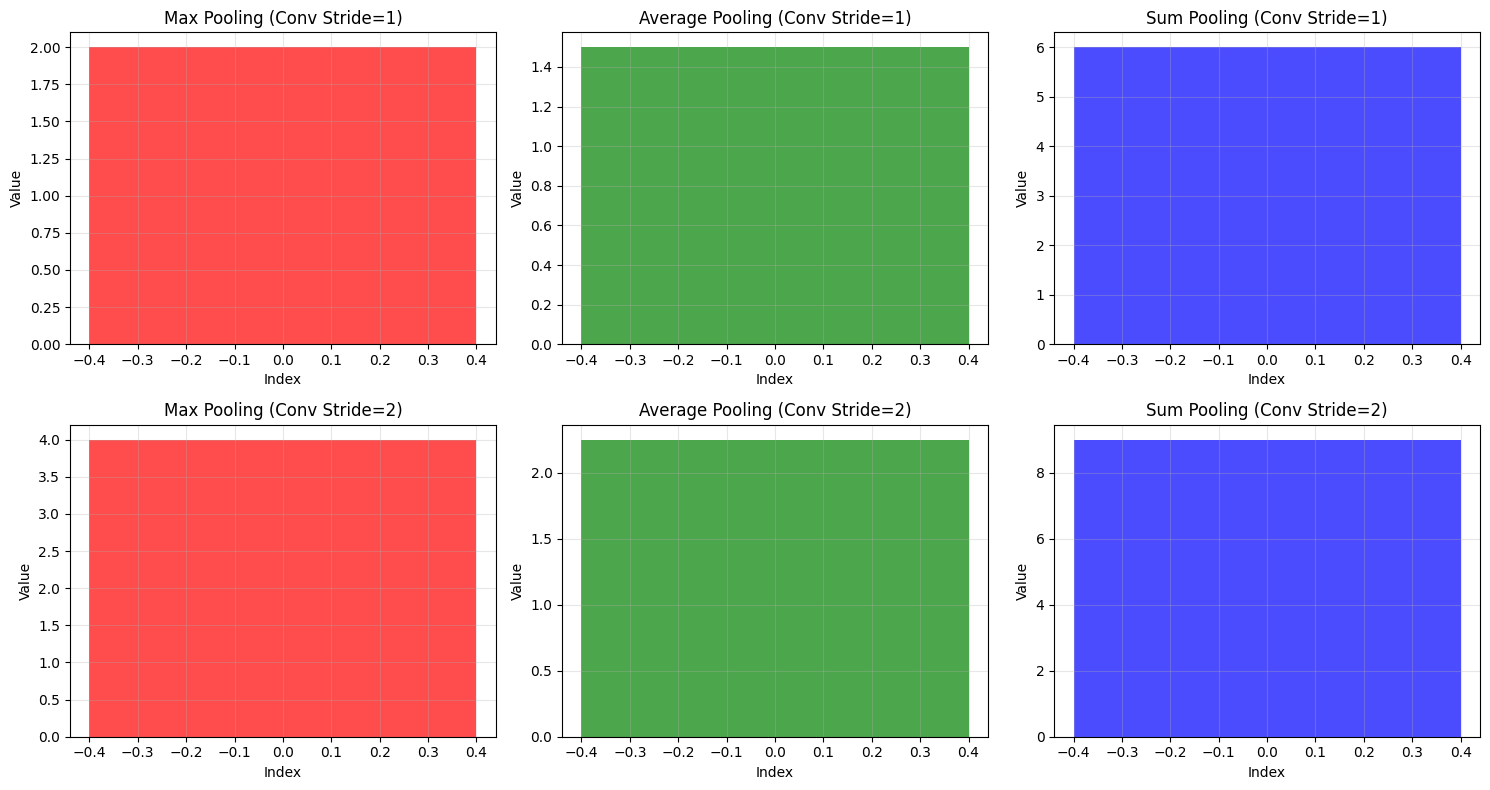

In [9]:
# Visualize the flattened feature maps
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Stride 1 convolution results
axes[0, 0].bar(range(len(flattened_max_s1)), flattened_max_s1, color='red', alpha=0.7)
axes[0, 0].set_title('Max Pooling (Conv Stride=1)')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].bar(range(len(flattened_avg_s1)), flattened_avg_s1, color='green', alpha=0.7)
axes[0, 1].set_title('Average Pooling (Conv Stride=1)')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('Value')
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].bar(range(len(flattened_sum_s1)), flattened_sum_s1, color='blue', alpha=0.7)
axes[0, 2].set_title('Sum Pooling (Conv Stride=1)')
axes[0, 2].set_xlabel('Index')
axes[0, 2].set_ylabel('Value')
axes[0, 2].grid(True, alpha=0.3)

# Stride 2 convolution results
axes[1, 0].bar(range(len(flattened_max_s2)), flattened_max_s2, color='red', alpha=0.7)
axes[1, 0].set_title('Max Pooling (Conv Stride=2)')
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('Value')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].bar(range(len(flattened_avg_s2)), flattened_avg_s2, color='green', alpha=0.7)
axes[1, 1].set_title('Average Pooling (Conv Stride=2)')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Value')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].bar(range(len(flattened_sum_s2)), flattened_sum_s2, color='blue', alpha=0.7)
axes[1, 2].set_title('Sum Pooling (Conv Stride=2)')
axes[1, 2].set_xlabel('Index')
axes[1, 2].set_ylabel('Value')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Task 4: Learn Weights and Bias Over an Epoch

Train a simple neural network layer on the flattened arrays from Q3 with:
- Randomly initialized weights
- Bias = 1
- Train for one epoch


In [10]:
# Prepare training data from flattened arrays
X_train = np.array([
    flattened_max_s1,
    flattened_avg_s1,
    flattened_sum_s1,
    flattened_max_s2,
    flattened_avg_s2,
    flattened_sum_s2
])

# Create synthetic labels (for demonstration)
y_train = np.array([1, 0, 1, 0, 1, 0])  # Binary classification

print(f"Training data shape: {X_train.shape}")
print(f"Labels shape: {y_train.shape}")
print(f"\nTraining data:")
print(X_train)
print(f"\nLabels: {y_train}")


Training data shape: (6, 1)
Labels shape: (6,)

Training data:
[[2.  ]
 [1.5 ]
 [6.  ]
 [4.  ]
 [2.25]
 [9.  ]]

Labels: [1 0 1 0 1 0]


In [11]:
# Simple Neural Network implementation
class SimpleNeuralNetwork:
    def __init__(self, input_size):
        # Random initialization of weights
        np.random.seed(42)
        self.weights = np.random.randn(input_size)
        self.bias = 1.0  # As specified
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def compute_loss(self, y_pred, y_true):
        # Binary cross-entropy loss
        epsilon = 1e-10
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def train(self, X, y, learning_rate=0.01, epochs=1):
        n_samples = X.shape[0]
        
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Compute loss
            loss = self.compute_loss(y_pred, y)
            
            # Backward pass
            error = y_pred - y
            
            # Compute gradients
            dw = np.dot(X.T, error) / n_samples
            db = np.mean(error)
            
            # Update weights and bias
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
            
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.6f}")
            
        return loss


In [12]:
# Get the maximum input size from our training data
input_size = X_train.shape[1]

# Create and train the model
print("="*50)
print("TRAINING NEURAL NETWORK")
print("="*50)

# Initialize model
model = SimpleNeuralNetwork(input_size)

print(f"\nInitial Weights (sample): {model.weights[:5]}")
print(f"Initial Bias: {model.bias}")

# Train for one epoch
print("\nTraining...")
model.train(X_train, y_train, learning_rate=0.1, epochs=1)

print(f"\nLearned Weights (sample): {model.weights[:5]}")
print(f"Learned Bias: {model.bias:.6f}")


TRAINING NEURAL NETWORK

Initial Weights (sample): [0.49671415]
Initial Bias: 1.0

Training...
Epoch 1/1, Loss: 1.779427

Learned Weights (sample): [0.27245221]
Learned Bias: 0.957442


## Task 5: Design and Implement a CNN for Image Classification

We'll implement a Convolutional Neural Network to classify images from the MNIST dataset.
 

In [13]:
# Import deep learning libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical

print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.20.0


Loading MNIST dataset...
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


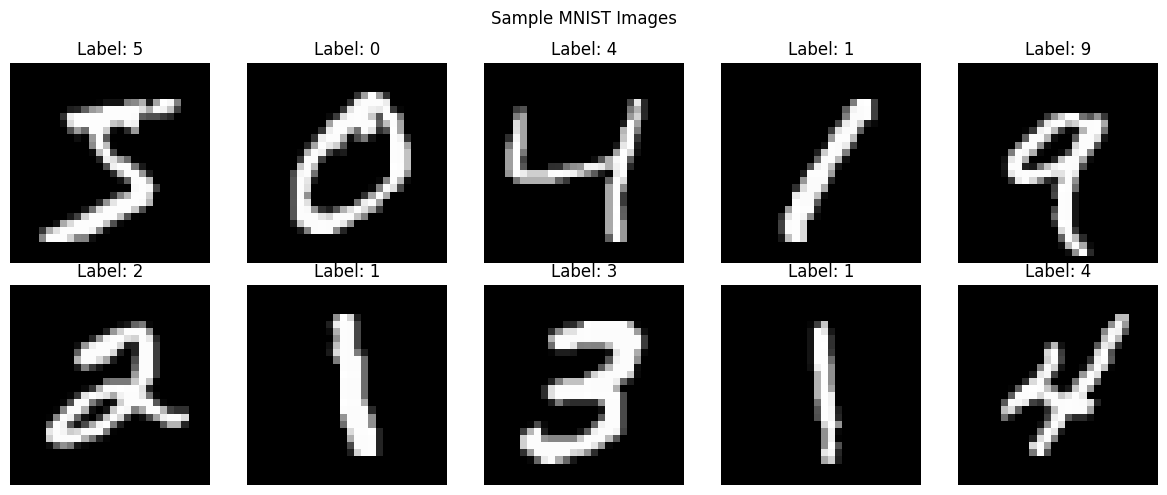

In [14]:
# Load MNIST dataset
print("Loading MNIST dataset...")
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

print(f"Training data shape: {X_train_mnist.shape}")
print(f"Test data shape: {X_test_mnist.shape}")

# Visualize some samples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_mnist[i], cmap='gray')
    ax.set_title(f'Label: {y_train_mnist[i]}')
    ax.axis('off')
plt.suptitle('Sample MNIST Images')
plt.tight_layout()
plt.show()


In [15]:
# Preprocess the data
# Reshape and normalize
X_train_mnist = X_train_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test_mnist = X_test_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train_mnist_cat = to_categorical(y_train_mnist, 10)
y_test_mnist_cat = to_categorical(y_test_mnist, 10)

print(f"Preprocessed training data shape: {X_train_mnist.shape}")
print(f"Preprocessed test data shape: {X_test_mnist.shape}")
print(f"Training labels shape: {y_train_mnist_cat.shape}")
print(f"Test labels shape: {y_test_mnist_cat.shape}")


Preprocessed training data shape: (60000, 28, 28, 1)
Preprocessed test data shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Test labels shape: (10000, 10)


In [16]:
# Build CNN model
def create_cnn_model():
    model = keras.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        
        # Second Convolutional Block
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        
        # Third Convolutional Block
        layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        
        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    return model

# Create the model
cnn_model = create_cnn_model()
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           51

 Total params: 471,018 (1.80 MB)

 Trainable params: 469,610 (1.79 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [17]:
# Compile the model
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully!")


Model compiled successfully!


In [18]:
# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# Train the model
print("Training CNN model...")
history = cnn_model.fit(
    X_train_mnist, y_train_mnist_cat,
    batch_size=128,
    epochs=4,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Training CNN model...
Epoch 1/4
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.8725 - loss: 0.4175 - val_accuracy: 0.2092 - val_loss: 3.6810 - learning_rate: 0.0010
Epoch 2/4
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - accuracy: 0.9694 - loss: 0.1026 - val_accuracy: 0.9905 - val_loss: 0.0354 - learning_rate: 0.0010
Epoch 3/4
422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.9793 - loss: 0.0726 - val_accuracy: 0.9932 - val_loss: 0.0253 - learning_rate: 0.0010
Epoch 4/4
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.9823 - loss: 0.0602 - val_accuracy: 0.9910 - val_loss: 0.0333 - learning_rate: 0.0010


In [19]:
# Evaluate the model
print("\nEvaluating model on test data...")
test_loss, test_accuracy = cnn_model.evaluate(X_test_mnist, y_test_mnist_cat, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")



Evaluating model on test data...
Test Loss: 0.0269
Test Accuracy: 99.16%


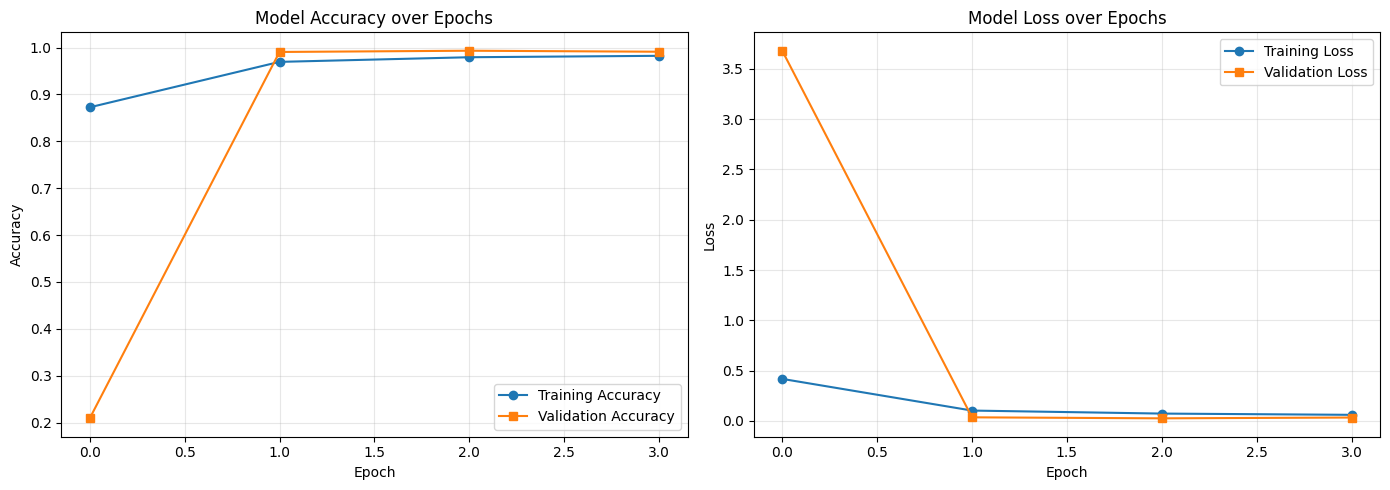

In [20]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
axes[0].set_title('Model Accuracy over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Validation Loss', marker='s')
axes[1].set_title('Model Loss over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


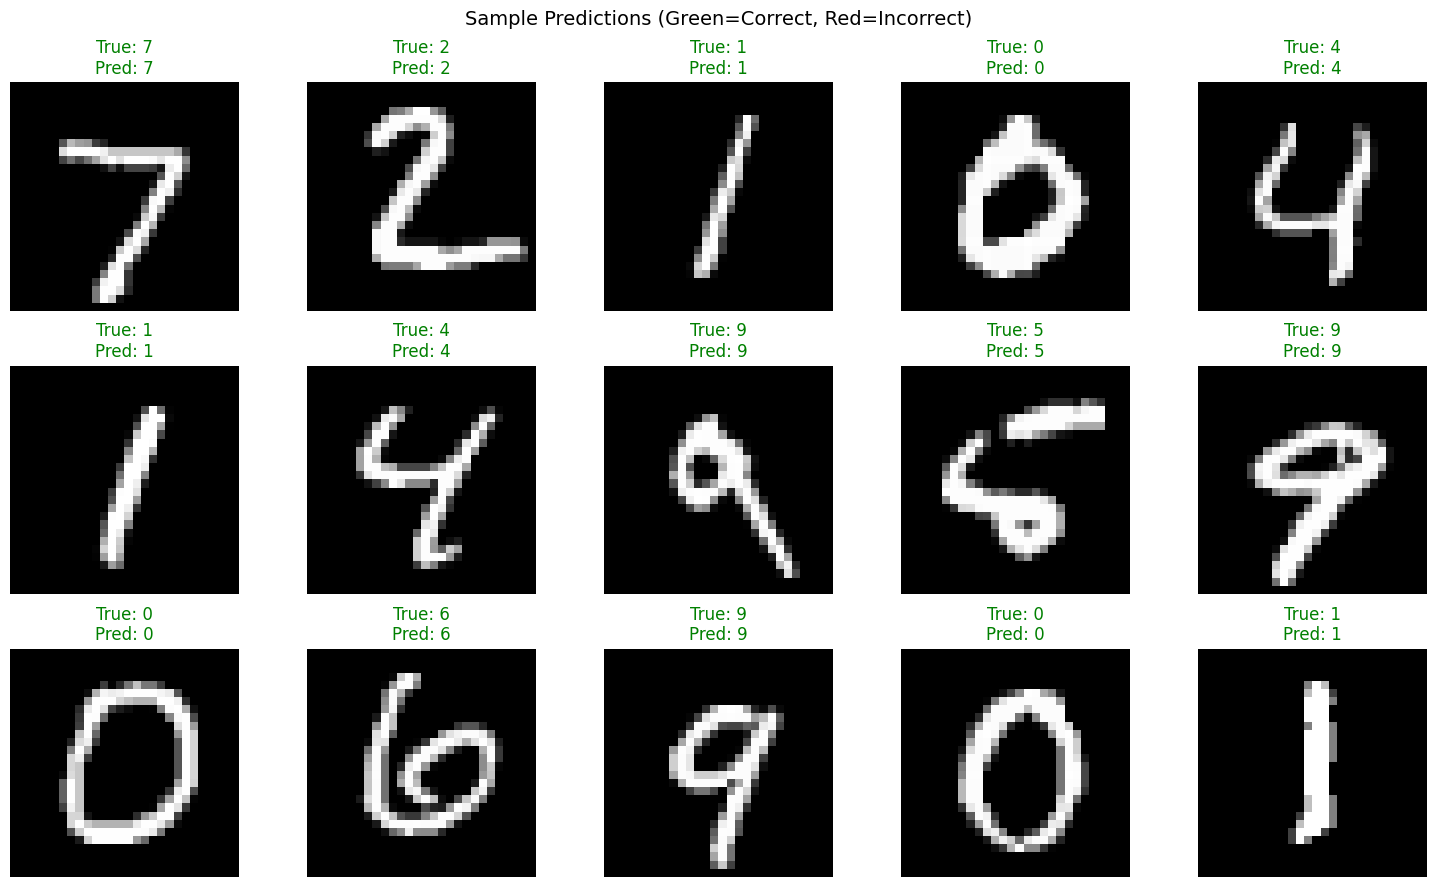

In [21]:
# Make predictions on test set
y_pred = cnn_model.predict(X_test_mnist)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_mnist_cat, axis=1)

# Show some predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_mnist[i].reshape(28, 28), cmap='gray')
    true_label = y_test_classes[i]
    pred_label = y_pred_classes[i]
    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'True: {true_label}\nPred: {pred_label}', color=color)
    ax.axis('off')

plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', fontsize=14)
plt.tight_layout()
plt.show()


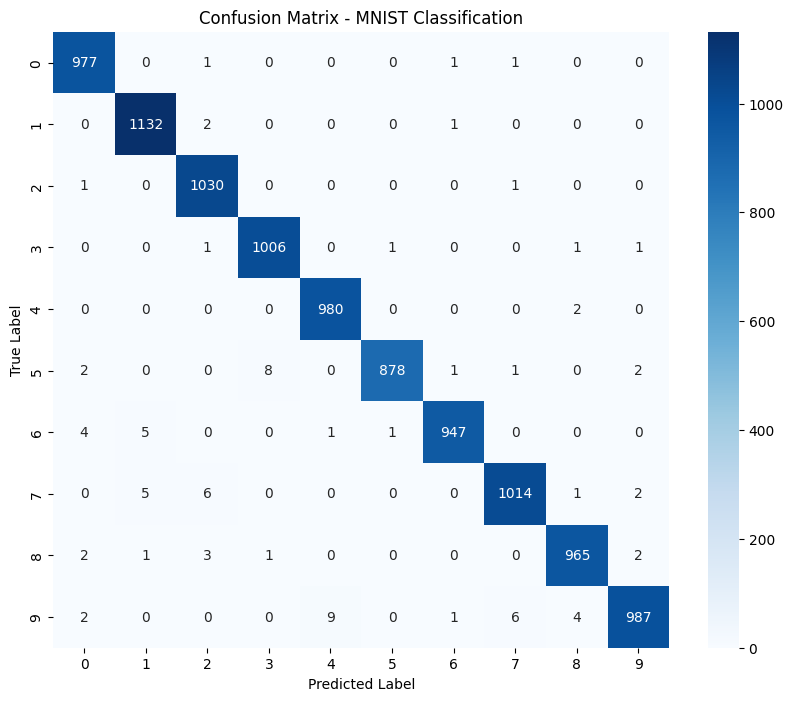


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [22]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, square=True)
plt.title('Confusion Matrix - MNIST Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=[str(i) for i in range(10)]))
